# Dataset Analysis
In this jupyter notebook, we will be analysing our dataset a little so we have an hands-on idea of what to do while making and training our ML Model.

The data obtained on Liver patients from **Andhra Pradesh, India**.
Let's get started by trying to learn and conclude some interesting facts.

## About the dataset
The data haven been [obtained from Kaggle](https://www.kaggle.com/abdullahanwar7/liver-disease-ml-classification). This **data set contains 416 liver patient records and 167 non liver patient records**. The data set was collected from test samples in North East of Andhra Pradesh, India.

# Reading the data
- The dataset is saved as `Indian Liver Patient Dataset.csv`.
- We will be converting it to an excel-like spreadsheet to get started with.
- All parameter will also be converted to numeric form to ensure or systems also understand them (Assuming computer only knows the language of numbers)
- If there are some incompleteness in our data we will try to rectify that as well.

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading csv file to datafrane
data = pd.read_csv("Indian Liver Patient Dataset.csv")
data.head(3)
data["is_patient"].value_counts()

1    416
2    167
Name: is_patient, dtype: int64

In [3]:
# Checking for null values in data
data.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [4]:
# We have four missing data in 'alkphos' column, filling this data wil the mean value of column
data["alkphos"] = data["alkphos"].fillna(data["alkphos"].mean())

In [5]:
data["gender"].value_counts()

Male      441
Female    142
Name: gender, dtype: int64

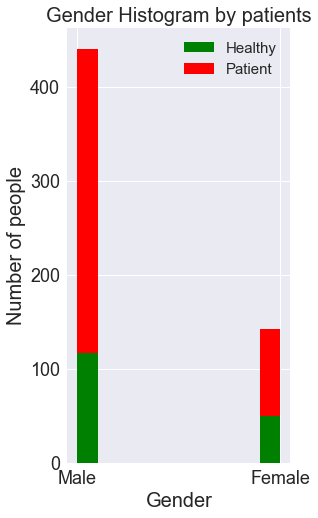

In [6]:
plt.style.use('seaborn')
plt.subplots(figsize=(4,8))
plt.hist(x = [data[data["is_patient"]==2]["gender"], data[data["is_patient"] ==1]["gender"]], 
         stacked=True, color = ['g','r'],label = ['Healthy','Patient'])
plt.title('Gender Histogram by patients', fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Number of people', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=15)
plt.savefig('./images/gender_histogram.png', bbox_inches='tight')

In [7]:
# Since only male and female are the two categories
# let's classify them as 0 and 1 respectively
data["gender"] = data["gender"].apply(lambda x: 1 if x == "Female" else 0)

,Dependence
Alkaline Phosphotase,0.162319
Aspartate Aminotransferase,0.161388
Gender,0.082416
Alamine Aminotransferase,0.035008
Age,-0.137351
AG Ratio,-0.151934
Albumin,-0.163416
Total Proteins,-0.184866
Total Bilirubin,-0.220208
Direct Bilirubin,-0.246046


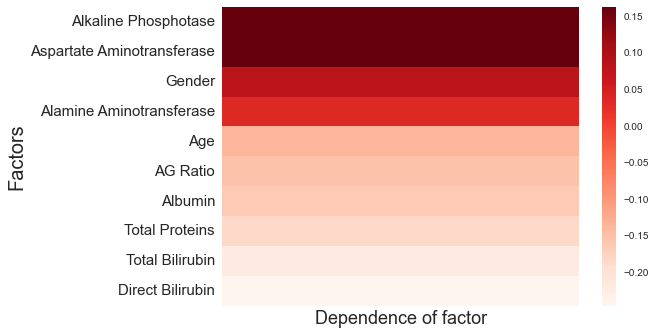

In [8]:
# Let's analyse the relation of one factor on others
renamer = {
    "age":"Age",
    "gender": "Gender",
    "tot_bilirubin":"Total Bilirubin",
    "direct_bilirubin":"Direct Bilirubin",
    "tot_proteins":"Total Proteins",
    "albumin":"Albumin",
    "ag_ratio":"AG Ratio",
    "sgpt":"Alamine Aminotransferase",
    "sgot":"Aspartate Aminotransferase",
    "alkphos":"Alkaline Phosphotase"
}
x = data.corrwith(data["is_patient"]).to_frame(name="Dependence").sort_values(by=["Dependence"], axis=0, ascending=False).drop(index=["is_patient"]).rename(renamer, axis=0)
fig, ax = plt.subplots()
sns.heatmap(x,cmap="Reds", xticklabels=False, ax = ax)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.set_ylabel("Factors", fontsize=20)
ax.set_xlabel("Dependence of factor", fontsize=18)
fig.savefig("./images/dependence.png", bbox_inches='tight')
x.style.background_gradient(cmap="Reds")

In [9]:
data.groupby(by=["gender"]).mean()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
gender,,,,,,,,,,
0,45.265306,3.613152,1.646032,286.789116,89.238095,123.070295,6.428345,3.099546,0.946449,1.265306
1,43.133803,2.322535,0.989437,302.338028,54.239437,69.042254,6.653521,3.273239,0.948973,1.352113


In [10]:
def generate_male_female_hist(factor:str, text:str, limit=None):
    plt.style.use("seaborn")
    fig, ax = plt.subplots(ncols=2, figsize=(15,7))
    male_data = data[data["gender"]==0]
    female_data = data[data["gender"]==1]
    if(limit != None):
        ax[0].hist(male_data[male_data[factor]<limit][factor],bins=15)
        ax[1].hist(female_data[female_data[factor]<limit][factor],bins=15)
    else:
        ax[0].hist(male_data[factor],bins=15)
        ax[1].hist(female_data[factor],bins=15)
    ax[0].axvline(x=male_data[factor].mean(), c="orange", label=f"Mean value ({male_data[factor].mean():.1f})", linestyle="--")
    ax[1].axvline(x=female_data[factor].mean(), c="orange", label=f"Mean value ({female_data[factor].mean():.1f})", linestyle="--")
    ax[0].set_ylabel("Frequency", fontsize=18)
    ax[1].set_ylabel("Frequency", fontsize=18)
    ax[0].tick_params(axis='both', which='major', labelsize=18)
    ax[1].tick_params(axis='both', which='major', labelsize=18)
    ax[0].set_title(f"{text} levels distribution in men", fontsize=20)
    ax[1].set_title(f"{text} levels distribution in women", fontsize=20)
    ax[0].legend(fontsize=12)
    ax[1].legend(fontsize=12)
    fig.savefig(f'./images/{text}.png', bbox_inches='tight');

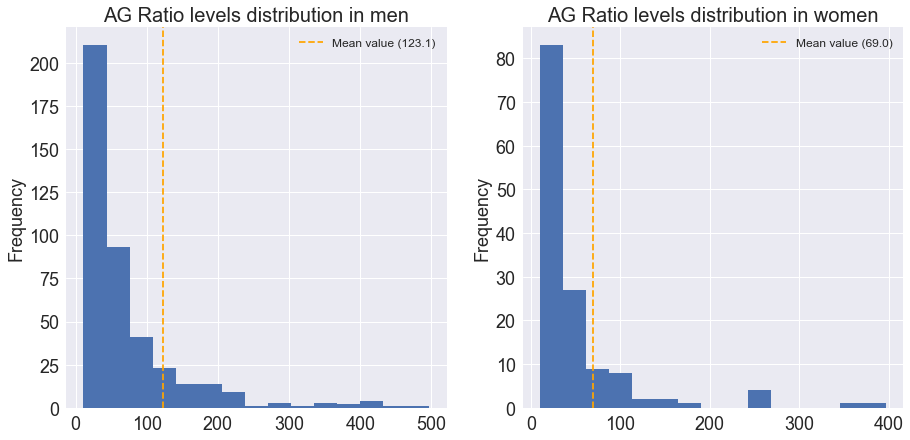

In [11]:

generate_male_female_hist("ag_ratio", "AG Ratio", 500)

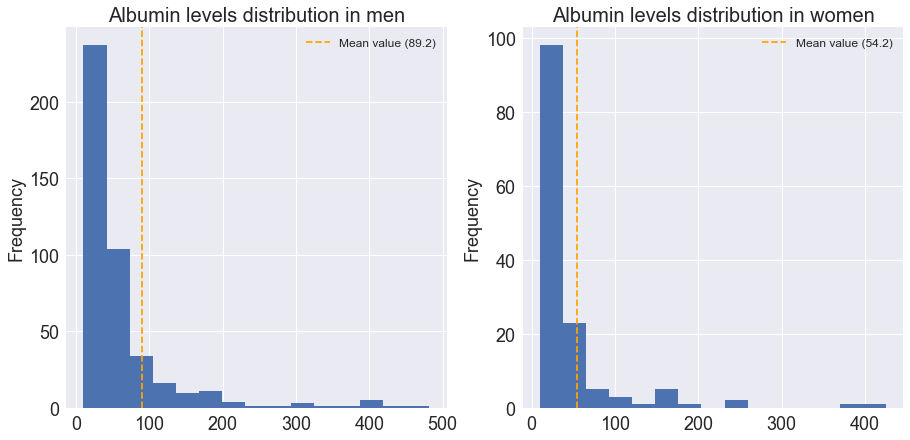

In [12]:

generate_male_female_hist("albumin", "Albumin", 500)

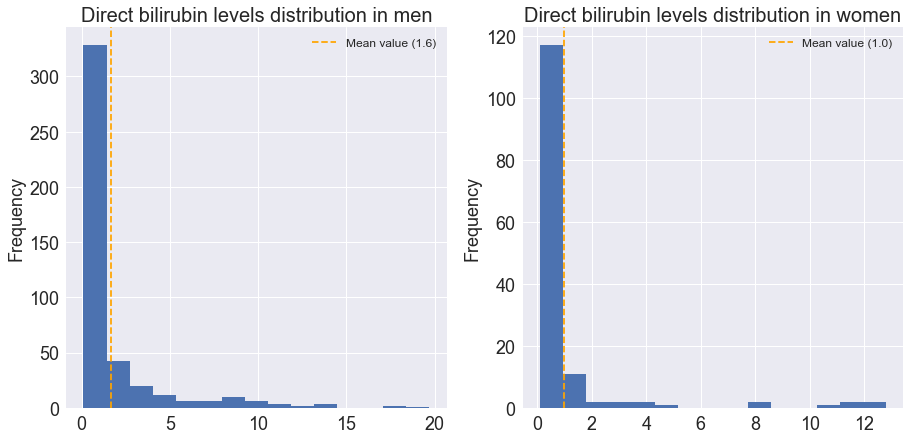

In [13]:
generate_male_female_hist("direct_bilirubin", "Direct bilirubin")

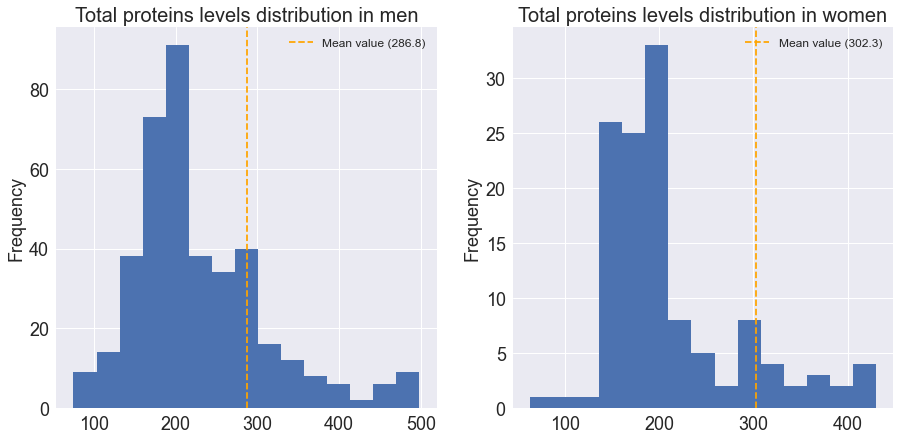

In [14]:
generate_male_female_hist("tot_proteins", "Total proteins", 500)

### Hypothesis
From the above colour-map and gender distribution, we can conclude that among all the factors we can conclude the following :
1. Liver Disease is closely related to levels of `Alkaline Phosphatase (ALP)` (`alkphos`) and `Aspartate Aminotransferase (AST)` (`sgot`)
1. Men are more likely to suffer from Liver Disease as compared to Women!
1. Along with these factors, a side-role is also played by the `Alanine Aminotransferase (ALT)` (`sgpt`), but it's contribution is relatively lower to the other factors, leading to hypothesis that `sgpt` is a factor which have to be considered along with the leading factors like `ALP` and `AST`
1. In general most of the factors are highly gender dependent. The levels of `Direct Bilirubin`, `Total Bilirubin` and `Albumin` & hence the `Albumin and Globulin Ratio` are higher in men.
1. From the histograms generated above, we mat say that the distribution curve of these factors despite being gender dependent is similar for both genders. The shape of curve is indistinguishable, only the spread of the curve varies!
    - Note : y-axis reresents the frequency and since we have more data avaliable for men, the frequency is higher. But regardless of the frequency the two data can be compared through visualization!

### Facts Check
- When the liver is damaged, ALP may leak into the bloodstream. High levels of ALP can indicate liver disease or bone disorders. [(Source : Medlineplus)](https://medlineplus.gov/lab-tests/alkaline-phosphatase/)
- AST is found in the highest concentrations in your liver, muscles, heart, kidney, brain and red blood cells. A small amount of AST is typically in your bloodstream. Higher-than-normal amounts of this enzyme in your blood may be a sign of a health problem. Abnormal levels can be associated with liver injury. [(Source : Healthline)](https://www.healthline.com/health/ast)
- In general, men are 2-fold more likely to die from chronic liver disease and cirrhosis than are women. [(Source : NCBI)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3992057/#:~:text=In%20general%2C%20men%20are%202,and%20cirrhosis%20than%20are%20women.)
- ALT is increased with liver damage and is used to screen for and/or monitor liver disease. Alanine aminotransferase (ALT) is usually measured concurrently with AST as part of a liver function panel to determine the source of organ damage. [(Source : Medscape)](https://emedicine.medscape.com/article/2087247-overview#:~:text=ALT%20is%20increased%20with%20liver%20damage%20and%20is%20used%20to%20screen%20for%20and/or%20monitor%20liver%20disease.%20Alanine%20aminotransferase%20(ALT)%20is%20usually%20measured%20concurrently%20with%20AST%20as%20part%20of%20a%20liver%20function%20panel%20to%20determine%20the%20source%20of%20organ%20damage.)
- A significantly high total and direct bilirubin, AST, ALT, total protein and globulin levels were observed in men compared to women. [(Source : Medrech)](https://www.medrech.com/index.php/medrech/article/view/326/)

Hence the above hypothesis we obtained from data fits in with the facts on Liver Diseases and enzymes.

## Relation of factors
Let's now study the relation of factors with each other!

In [15]:
data.head(3)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1


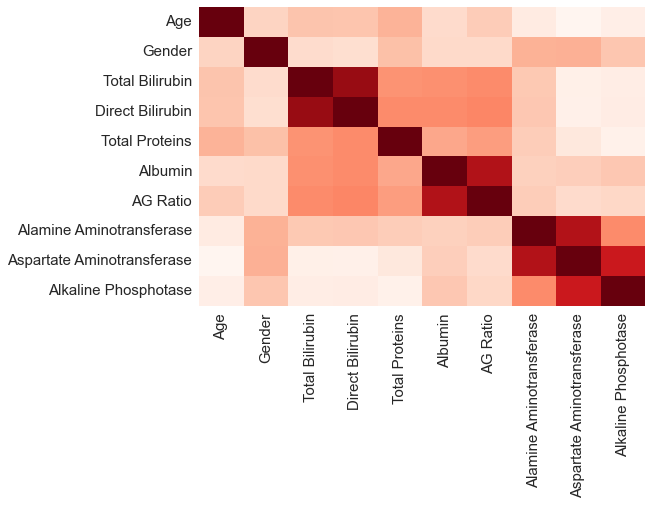

In [16]:
plt.style.use("seaborn")
fig, ax = plt.subplots()
sns.heatmap(data.drop(["is_patient"],axis=1).rename(renamer, axis=1).corr(), cmap="Reds", cbar=False, ax=ax);
ax.tick_params(axis='both', labelsize=15)
fig.savefig("./images/corelations.png", bbox_inches='tight')

## Plotting and Checking
Let's plot some of corelated factors and evaluate their relationship.

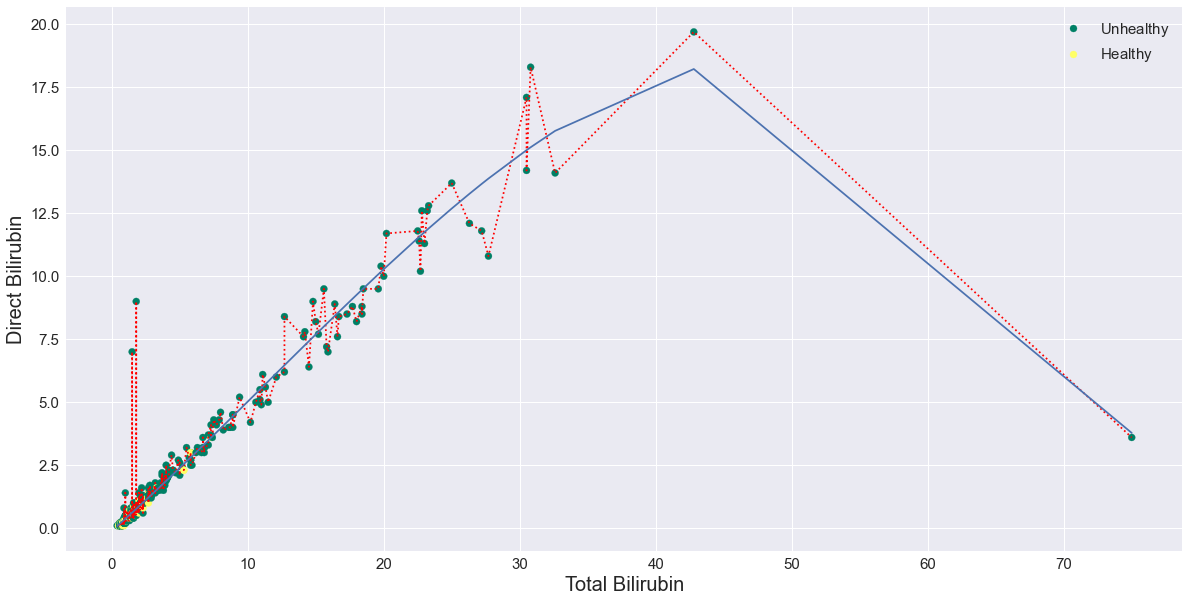

In [17]:
plt.style.use("seaborn")
x = data.sort_values(by=["tot_bilirubin"]).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
male_scatter = ax.scatter(x["tot_bilirubin"],x["direct_bilirubin"],c=x["is_patient"],cmap="summer")
ax.plot(x["tot_bilirubin"],x["direct_bilirubin"],c="red", linestyle=':')
handles, labels = male_scatter.legend_elements()
newLabels = []
for i in labels:
    newLabels.append(i.replace("1", "Unhealthy").replace("2", "Healthy"))
ax.legend(handles, newLabels, loc="upper right", fontsize=15)
ax.set_ylabel("Direct Bilirubin", fontsize=20)
ax.set_xlabel("Total Bilirubin", fontsize=20)
ax.tick_params(labelsize=15)
plt.plot(np.unique(x["tot_bilirubin"]), np.poly1d(np.polyfit(x=x["tot_bilirubin"], y=x["direct_bilirubin"], deg=3))(np.unique(x["tot_bilirubin"])))
plt.savefig("./images/direct_total_bilirubin_rltn.png", bbox_inches='tight')

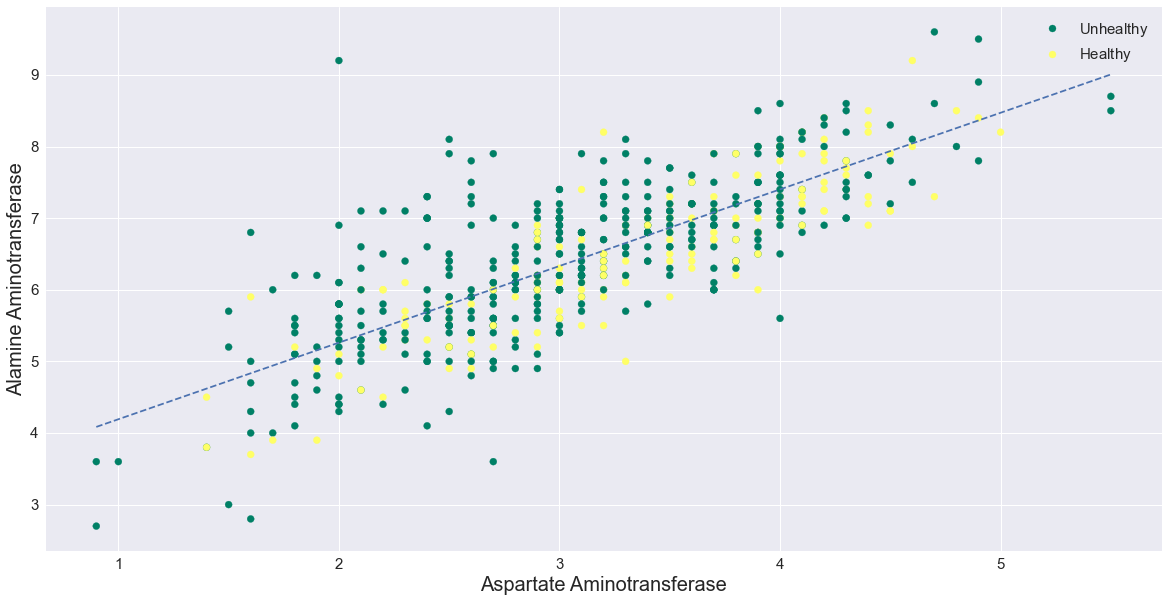

In [18]:
plt.style.use("seaborn")
x = data.sort_values(by=["sgot"]).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
male_scatter = ax.scatter(x["sgot"],x["sgpt"],c=x["is_patient"],cmap="summer")
#ax.plot(x["sgot"],x["sgpt"],c="red", linestyle=':')
handles, labels = male_scatter.legend_elements()
newLabels = []
for i in labels:
    newLabels.append(i.replace("1", "Unhealthy").replace("2", "Healthy"))
ax.legend(handles, newLabels, loc="upper right", fontsize=15)
ax.set_ylabel("Alamine Aminotransferase", fontsize=20)
ax.set_xlabel("Aspartate Aminotransferase", fontsize=20)
ax.tick_params(labelsize=15)
plt.plot(np.unique(x["sgot"]), np.poly1d(np.polyfit(x=x["sgot"], y=x["sgpt"], deg=1))(np.unique(x["sgot"])), linestyle='--')
plt.savefig("./images/sgpt_sgot_rltn.png", bbox_inches='tight')

- From here we come up with another hyothesis that data factors which are corelated doesn't seem so random.
- They form a linear relation upto a certain point. And even beyond those points they can be visualized on a straight line!

## Finishing Up
This completes our knowledge on the dataset and improves our awaresness on Liver Disease as well!

Now that we have a prerequiste information, we are ready to get started with our Machine Learning Model.
We will be learning what is a model, try to create a model by ourselves, learn how our model works and much more!